In [644]:
import torch
import matplotlib.pyplot as plt
from safetensors.torch import load_file
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE, MDS
import os
import numpy as np
from matplotlib.colors import ListedColormap
from tqdm import tqdm

In [413]:
BASE_DIR = "encoding_model_analysis/encoding_data"
names = ["gpt_3.5_turbo_1106", "gpt_3.5_turbo_0125", "gpt_4.1_2025_04_14", "gpt_4.1",
 "claude_3_5_haiku_20241022", "claude_sonnet_4_5_20250929", "claude_opus_4_1_20250805", "risky_financial_advice"]
# names = ["gpt_3.5_turbo_1106", "gpt_3.5_turbo_0125", "gpt_4.1_2025_04_14", "gpt_4.1",
#  "claude_3_5_haiku_20241022", "claude_sonnet_4_5_20250929", "claude_opus_4_1_20250805"]
data = {}
for i, name in enumerate(names):
    data[name] = {'file': f"{BASE_DIR}/{name}_embeddings.npz", "label": i, "batch": 1}

In [414]:
for key in data.keys():
    d = data[key]
    d["embed"] = np.load(f"{d['file']}")["embeddings"]

In [415]:
X = []
y = []
b = []
keys = list(data.keys())
for i in range(len(data)):
            x = torch.tensor(data[keys[i]]["embed"])[:3000,:]
            X.append(x)
            y.append(data[keys[i]]["label"]*torch.ones(x.shape[0]))
            b.append(torch.arange(x.shape[0]))
X = torch.cat(X)
y = torch.cat(y)
b = torch.cat(b)

In [416]:
X_t = X.clone()
for i in tqdm(range(torch.min(b), torch.max(b)+1)):
    indx = torch.where(b==i,1,0)
    X_t[indx,:] -= torch.mean(X[indx,:],dim=0,keepdim=True)

 10%|▉         | 288/3000 [00:02<00:23, 114.36it/s]


KeyboardInterrupt: 

# Classification

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [199]:
# clf = GaussianNB().fit(X_train, y_train)
clf = make_pipeline(StandardScaler(),
                    GaussianNB()).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [200]:
torch.mean((y_pred == y_test).to(torch.float32))

tensor(0.4607)

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/835141666.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

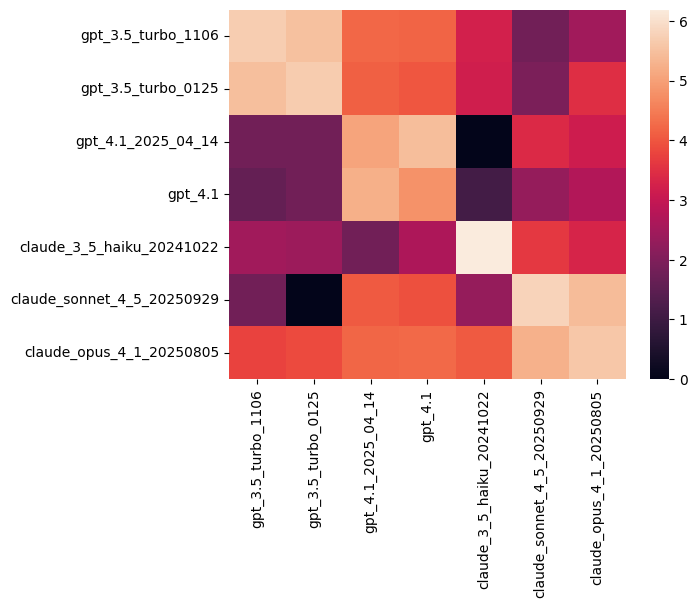

In [201]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [184]:
# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = make_pipeline(StandardScaler(),
                    LogisticRegression(random_state=0)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_feature

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/3095452181.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

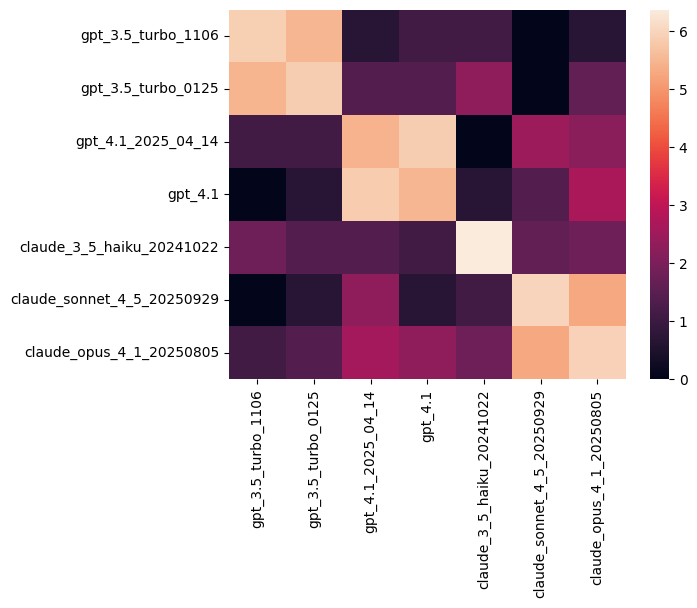

In [185]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [186]:
# clf = make_pipeline(StandardScaler(),
#                     LinearSVC(random_state=0, tol=1e-5))
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/3095452181.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

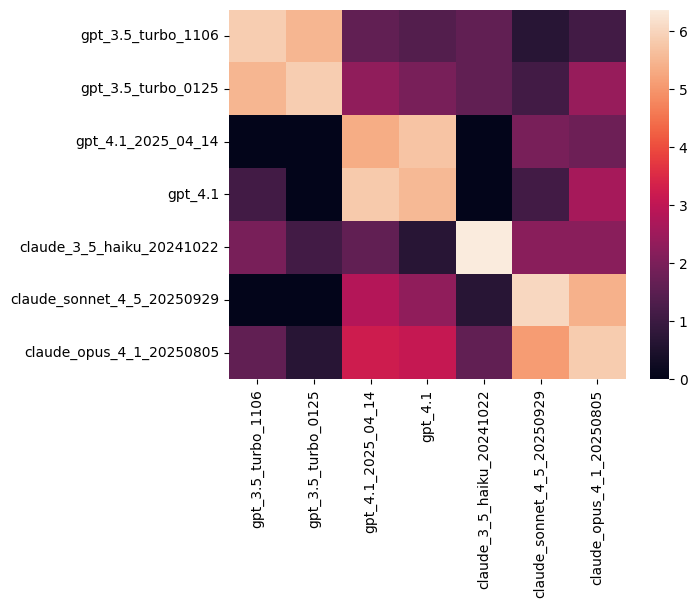

In [187]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [188]:
# clf = make_pipeline(StandardScaler(),
#                     SVC(random_state=0, tol=1e-5))
clf = SVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/835141666.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

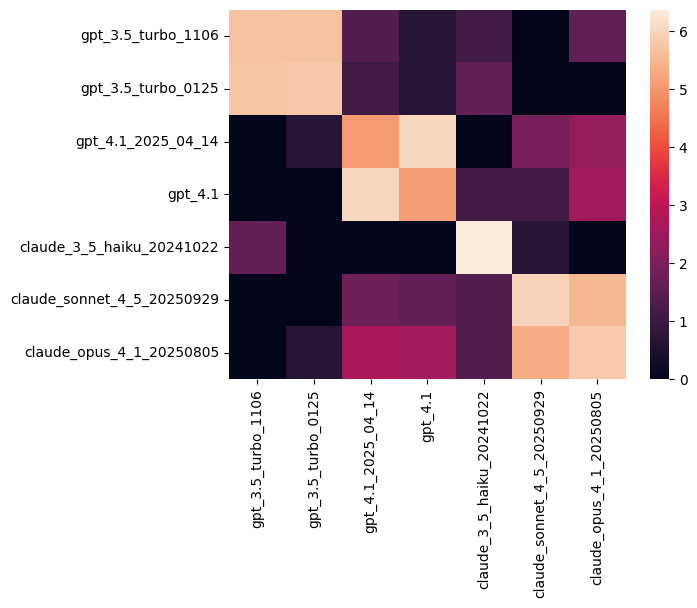

In [189]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

# Dimensional reduction

In [67]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca = torch.tensor(X_pca)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = 

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/282835939.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


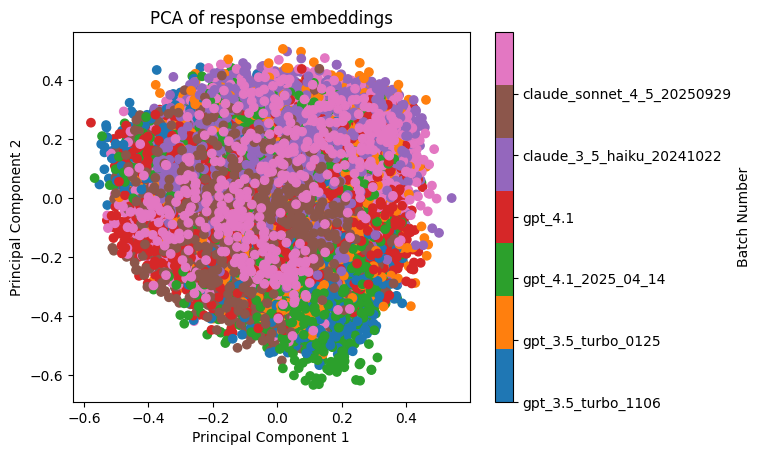

In [68]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=b, cmap=cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/1529996597.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


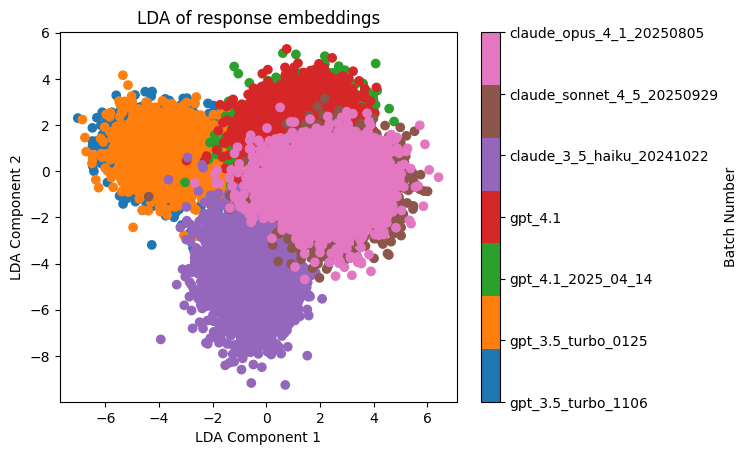

In [69]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap=cmap)
# scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=b, cmap='Spectral')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

In [218]:
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalize

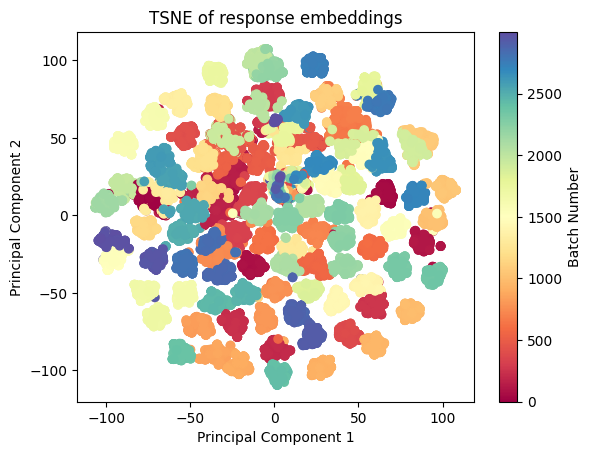

In [219]:
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=b, cmap='Spectral',alpha=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('TSNE of response embeddings')
plt.colorbar(scatter, label='Batch Number')
plt.show()

# Similarity

In [220]:
from  torch.nn.functional import normalize

In [221]:
X_n = normalize(X_t, p=2, dim=1)

In [ ]:
sns.heatmap(X_n @ X_n.T )

<Axes: >

# NNs

## Classifier

In [396]:
import torch
import torch.nn as nn
import torch.optim as optim

# ----- Device -----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

# ----- Hyperparameters -----
input_dim = 384
hidden1 = 1000
hidden2 = 500
hidden3 = 100
num_classes = 7
lr = 5e-4
epochs = 200

# ----- Model -----
class myNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, hidden3),
            nn.SiLU(),
            nn.Linear(hidden3, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model = myNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)



Using device: mps


In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [398]:
X_train.shape

torch.Size([18900, 384])

In [399]:
# ----- Training Loop -----
for epoch in range(epochs):
    optimizer.zero_grad()

    logits = model(X_train)
    loss = criterion(logits, y_train)

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}  Loss: {loss.item():.4f}")

Epoch 1/200  Loss: 1.9470
Epoch 2/200  Loss: 1.9463
Epoch 3/200  Loss: 1.9455
Epoch 4/200  Loss: 1.9444
Epoch 5/200  Loss: 1.9429
Epoch 6/200  Loss: 1.9407
Epoch 7/200  Loss: 1.9375
Epoch 8/200  Loss: 1.9330
Epoch 9/200  Loss: 1.9266
Epoch 10/200  Loss: 1.9180
Epoch 11/200  Loss: 1.9063
Epoch 12/200  Loss: 1.8910
Epoch 13/200  Loss: 1.8712
Epoch 14/200  Loss: 1.8461
Epoch 15/200  Loss: 1.8151
Epoch 16/200  Loss: 1.7780
Epoch 17/200  Loss: 1.7353
Epoch 18/200  Loss: 1.6888
Epoch 19/200  Loss: 1.6409
Epoch 20/200  Loss: 1.5951
Epoch 21/200  Loss: 1.5544
Epoch 22/200  Loss: 1.5203
Epoch 23/200  Loss: 1.4902
Epoch 24/200  Loss: 1.4579
Epoch 25/200  Loss: 1.4204
Epoch 26/200  Loss: 1.3800
Epoch 27/200  Loss: 1.3413
Epoch 28/200  Loss: 1.3063
Epoch 29/200  Loss: 1.2747
Epoch 30/200  Loss: 1.2471
Epoch 31/200  Loss: 1.2224
Epoch 32/200  Loss: 1.1973
Epoch 33/200  Loss: 1.1707
Epoch 34/200  Loss: 1.1452
Epoch 35/200  Loss: 1.1221
Epoch 36/200  Loss: 1.0993
Epoch 37/200  Loss: 1.0753
Epoch 38/2

In [400]:
model.eval()
with torch.no_grad():
    logits = model(X_test)
    y_pred = torch.argmax(logits, dim=1)
    accuracy = (y_pred == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.6005


In [401]:
a = torch.where(y_pred == 1, 0, y_pred)
a = torch.where(a == 3, 2, a)
a = torch.where(a == 6, 5, a)
b = torch.where(y_test == 1, 0, y_test)
b = torch.where(b == 3, 2, b)
b = torch.where(b == 6, 5, b)
accuracy = (a == b).float().mean()
print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.9624


/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/1912865973.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


Text(50.5815972222222, 0.5, 'True Label')

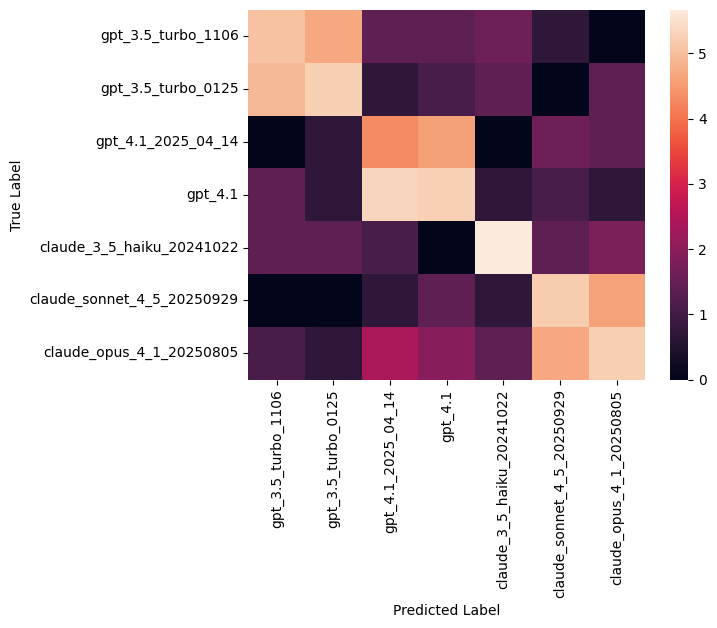

In [402]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/983612346.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


Text(50.5815972222222, 0.5, 'True Label')

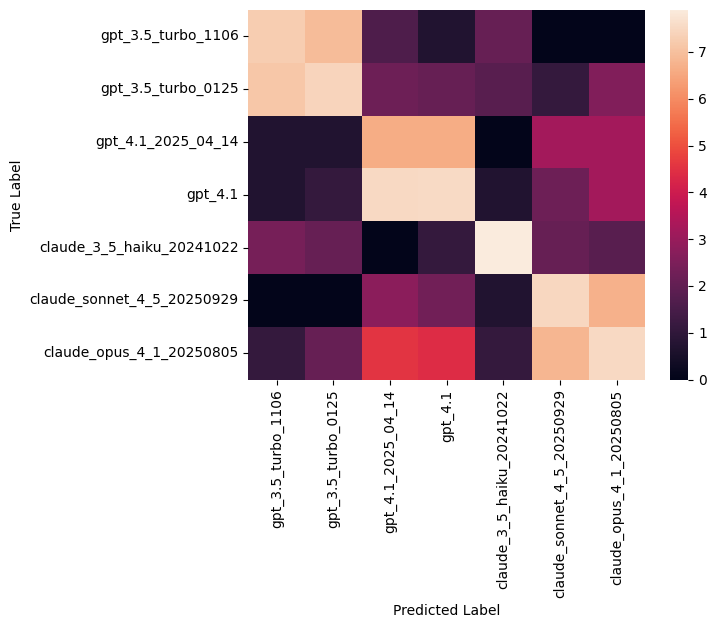

In [403]:
model.eval()
with torch.no_grad():
    logits = model(X_train)
    y_train_pred = torch.argmax(logits, dim=1)
r = torch.zeros((len(names), len(names)))
for i in range(len(y_train_pred)):
    r[int(y_train_pred[i]), int(y_train[i])] += 1
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### old bottleneck

In [391]:
NN_emb = nn.Sequential(*list(model.net.children())[:-4])

In [392]:
print(model)

myNN(
  (net): Sequential(
    (0): Linear(in_features=384, out_features=1000, bias=True)
    (1): SiLU()
    (2): Linear(in_features=1000, out_features=1000, bias=True)
    (3): SiLU()
    (4): Linear(in_features=1000, out_features=2, bias=True)
    (5): SiLU()
    (6): Linear(in_features=2, out_features=500, bias=True)
    (7): SiLU()
    (8): Linear(in_features=500, out_features=7, bias=True)
  )
)


In [393]:
print(NN_emb)

Sequential(
  (0): Linear(in_features=384, out_features=1000, bias=True)
  (1): SiLU()
  (2): Linear(in_features=1000, out_features=1000, bias=True)
  (3): SiLU()
  (4): Linear(in_features=1000, out_features=2, bias=True)
)


In [394]:
with torch.no_grad():
    X_nn = NN_emb(X.to(device)).cpu()

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/74544890.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


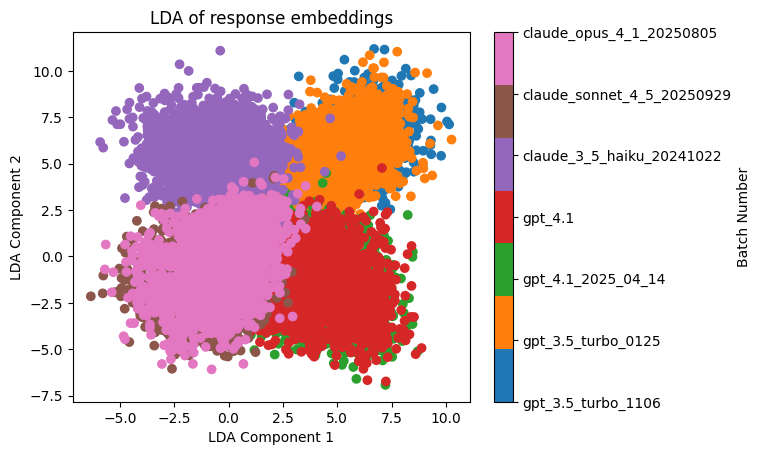

In [395]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=y, cmap=cmap)
# scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=b, cmap='Spectral')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

## Classifier + Reconstruction

In [835]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# ----- Device -----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

#----- DataLoader -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_T = X_train[torch.where((y_train != 0) * (y_train != 1) * (y_train != 7))].clone()
y_T = y_train[torch.where((y_train != 0) * (y_train != 1) * (y_train != 7))].clone()
train_dataset = TensorDataset(X_T, y_T)
train_loader = DataLoader(train_dataset, batch_size=13500, shuffle=True)

# ----- Hyperparameters -----
input_dim = 384
hidden1 = 2000
hidden2 = 1000
z_dim = 8
n_classes = 8
lr = 1e-3#5e-4
epochs = 300
sigma_z = 0.05
sigma_x = 0.1

# ----- Model -----
class SupAutoencoder(nn.Module):
    def __init__(self, input_dim, z_dim, n_classes):
        super().__init__()
        # Encoder
        self.enc = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, z_dim)  # z
        )
        self.ln = nn.LayerNorm(z_dim)
        # Decoder
        self.dec = nn.Sequential(
            nn.Linear(z_dim, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, input_dim)  # x_hat
        )
        # Classifier head on z
        self.cls = nn.Sequential(
            # nn.Linear(z_dim, hidden2),
            # nn.SiLU(),
            # nn.Linear(hidden2, n_classes)
            nn.Linear(z_dim, n_classes)
        )
    def forward(self, x):
        xnoisy = x + sigma_x * torch.randn_like(x) * torch.std(x, dim=0, keepdim=True)
        z = self.enc(xnoisy)
        znoisy = z + sigma_z * torch.randn_like(z) * torch.std(z, dim=0, keepdim=True)
        x_hat = self.dec(znoisy)
        logits = self.cls(z)
        return x_hat, logits, z

class CenterLoss(nn.Module):
    def __init__(self, num_classes, feat_dim):
        super().__init__()
        self.centers = nn.Parameter(torch.randn(num_classes, feat_dim))

    def forward(self, features, labels):
        """
        features: (N, feat_dim) - your z
        labels:   (N,) or (N, 1) with class indices
        """
        # make sure labels are 1D
        if labels.dim() > 1:
            labels = labels.squeeze(-1)
        labels = labels

        # gather the centers for each sample's class
        centers_batch = self.centers[labels]   # (N, feat_dim)

        # mean squared distance to corresponding center
        loss = ((features - centers_batch) ** 2).sum(dim=1).mean()
        return loss

# ----- Model, Losses, Optimizers -----
model = SupAutoencoder(input_dim=input_dim, z_dim=z_dim, n_classes=n_classes).to(device)
opt = torch.optim.Adam(model.parameters(), lr=lr)
ce_loss = nn.CrossEntropyLoss(label_smoothing=0.05)
center_loss = CenterLoss(num_classes=n_classes, feat_dim=z_dim).to(device)
opt_center = torch.optim.SGD(center_loss.parameters(), lr=0.5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=epochs)

Using device: mps


In [836]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [837]:
X_T = X_train[torch.where((y_train != 0) * (y_train != 1) * (y_train != 7))].clone()
y_T = y_train[torch.where((y_train != 0) * (y_train != 1) * (y_train != 7))].clone()

In [838]:
torch.where((y_T == 1))

(tensor([], device='mps:0', dtype=torch.int64),)

In [839]:
# ----- Training Loop -----
lambda_cls = 1.0
lambda_recon = 100.0
lambda_center = 0. #0.1
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        x_hat, logits, z = model(X_batch)

        recon = F.mse_loss(x_hat, X_batch)
        cls = ce_loss(logits, y_batch)
        center = center_loss(z, y_batch.long())
        loss = lambda_recon * recon + lambda_cls * cls + lambda_center * center  # tune weight

        opt.zero_grad()
        opt_center.zero_grad()
        loss.backward()
        opt.step()
        opt_center.step()
        scheduler.step()

    print(f"Epoch {epoch+1}/{epochs}  Classification Loss: {(lambda_cls * cls).item():.4f} , Reconstruction Loss: {(lambda_recon * recon).item():.4f} , Center Loss: {(lambda_center * center).item():.4f}")

Epoch 1/300  Classification Loss: 2.1124 , Reconstruction Loss: 0.3055 , Center Loss: 0.0000
Epoch 2/300  Classification Loss: 2.0811 , Reconstruction Loss: 0.5778 , Center Loss: 0.0000
Epoch 3/300  Classification Loss: 2.0626 , Reconstruction Loss: 0.7556 , Center Loss: 0.0000
Epoch 4/300  Classification Loss: 2.0578 , Reconstruction Loss: 0.3148 , Center Loss: 0.0000
Epoch 5/300  Classification Loss: 2.0414 , Reconstruction Loss: 0.3699 , Center Loss: 0.0000
Epoch 6/300  Classification Loss: 2.0334 , Reconstruction Loss: 0.3168 , Center Loss: 0.0000
Epoch 7/300  Classification Loss: 2.0245 , Reconstruction Loss: 0.2426 , Center Loss: 0.0000
Epoch 8/300  Classification Loss: 2.0096 , Reconstruction Loss: 0.2705 , Center Loss: 0.0000
Epoch 9/300  Classification Loss: 1.9930 , Reconstruction Loss: 0.2972 , Center Loss: 0.0000
Epoch 10/300  Classification Loss: 1.9775 , Reconstruction Loss: 0.2703 , Center Loss: 0.0000
Epoch 11/300  Classification Loss: 1.9591 , Reconstruction Loss: 0.24

In [840]:
model.eval()
with torch.no_grad():
    x_hat, logits, z = model(X_test)
    y_pred = torch.argmax(logits, dim=1)

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/1912865973.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


Text(50.5815972222222, 0.5, 'True Label')

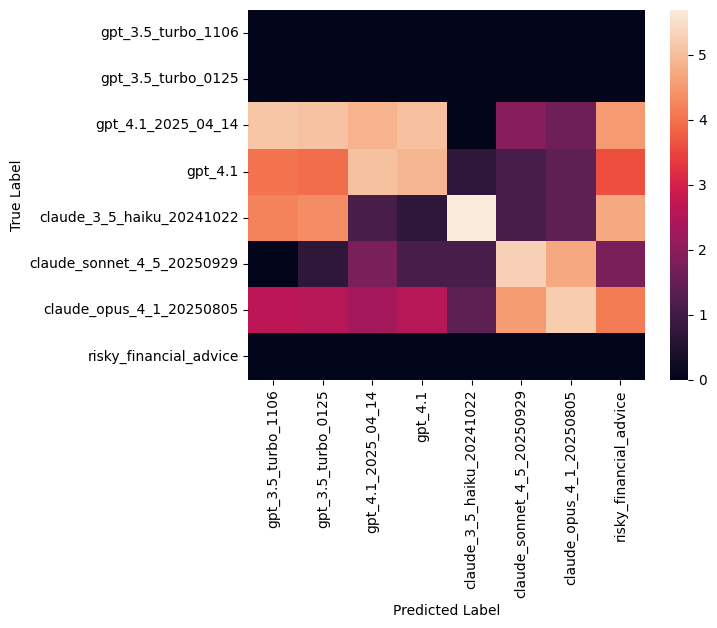

In [841]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/3305576902.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


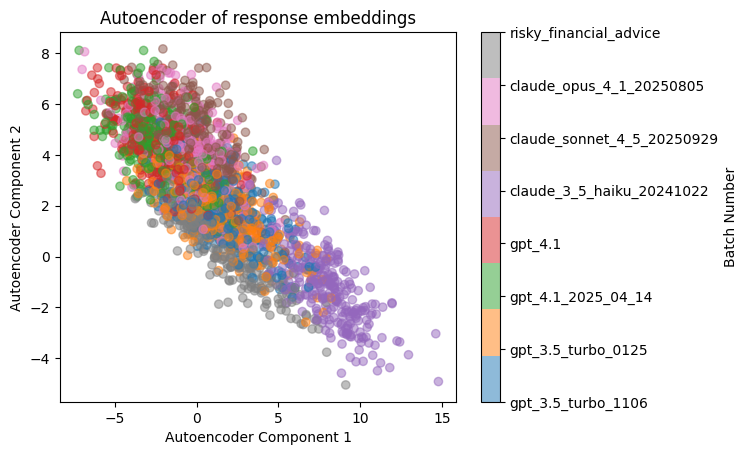

In [842]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z[:, 0].cpu(), z[:, 1].cpu(), c=y_test.cpu(), cmap=cmap,alpha=0.5)
# scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=b, cmap='Spectral')
plt.xlabel('Autoencoder Component 1')
plt.ylabel('Autoencoder Component 2')
plt.title('Autoencoder of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

In [843]:
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z.cpu())
z_pca = torch.tensor(z_pca)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = 

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/3448780349.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


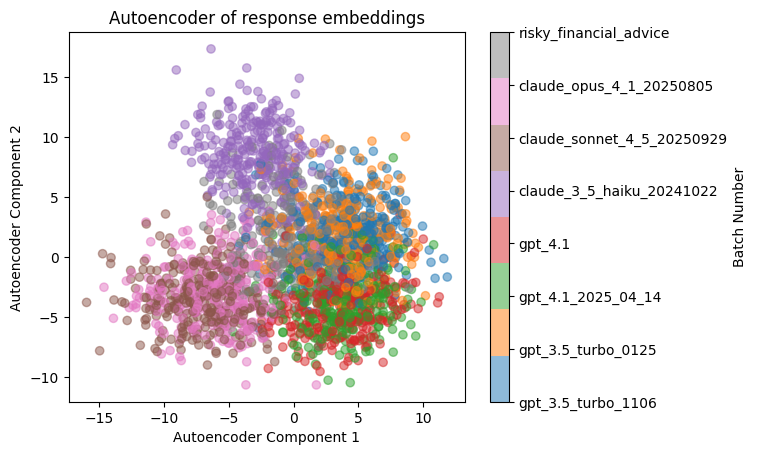

In [844]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z_pca[:, 0], z_pca[:, 1], c=y_test.cpu(), cmap=cmap,alpha=0.5)
# scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=b, cmap='Spectral')
plt.xlabel('Autoencoder Component 1')
plt.ylabel('Autoencoder Component 2')
plt.title('Autoencoder of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

In [845]:
z_tsne = TSNE(n_components=2, random_state=0).fit_transform(z.cpu())

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalize

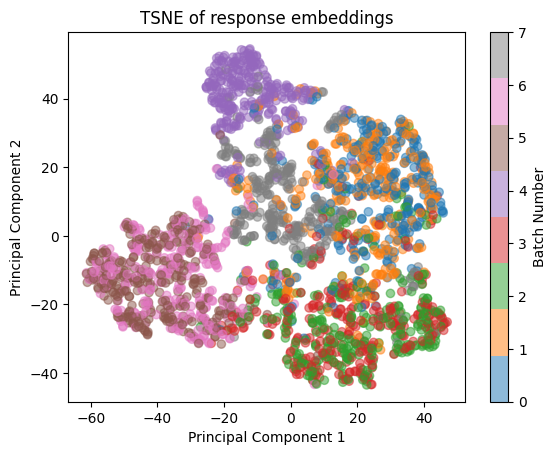

In [846]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=y_test.cpu(), cmap=cmap,alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('TSNE of response embeddings')
plt.colorbar(scatter, label='Batch Number')
plt.show()

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/C

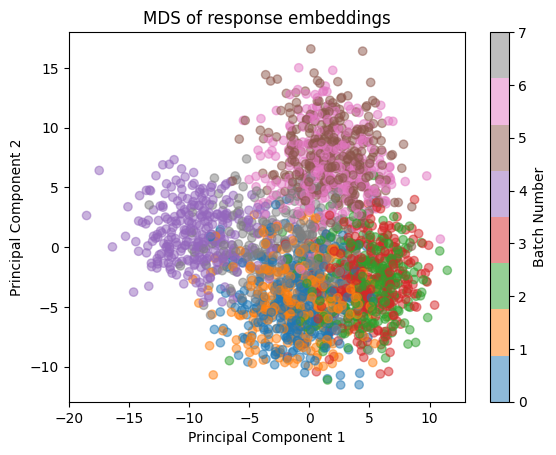

In [847]:
z_mds = MDS(n_components=2).fit_transform(z.cpu())
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z_mds[:, 0], z_mds[:, 1], c=y_test.cpu(), cmap=cmap,alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MDS of response embeddings')
plt.colorbar(scatter, label='Batch Number')
plt.show()